Text(0.5, 1.0, 'Love between Romeo and Juliet')

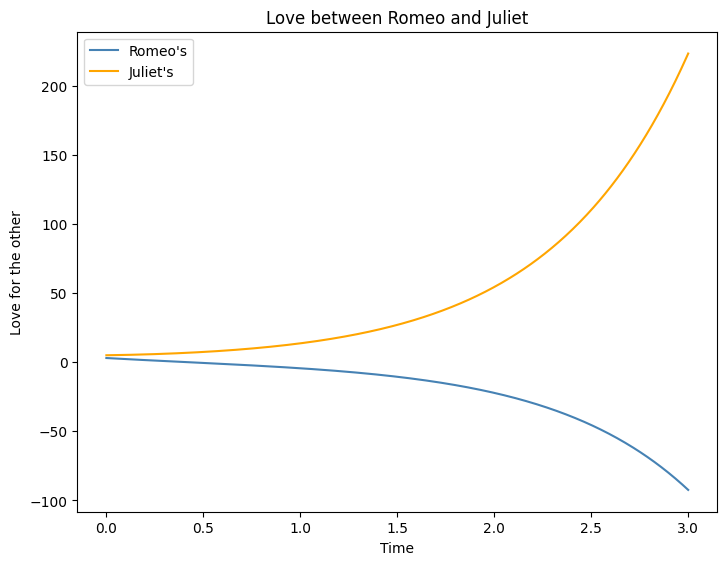

In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as integrate
import matplotlib.pyplot as plt

a = -1
b = -1
c = -1
d = 1
R0 = 3
J0 = 5
tmax = 3

# function that returns dz/dt
def model(z,t):
    x = z[0]
    y = z[1]
    dxdt = a*x + b*y
    dydt = c*x + d*y
    dzdt = [dxdt, dydt]
    return dzdt

# initial condition
z0 = [R0,J0]

# number of time points
n = 500

# time points
t = np.linspace(0,tmax,n)

sol = odeint(model, z0, t)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, sol[:, 0], color = 'steelblue')
ax.plot(t, sol[:, 1], color = 'orange')
ax.set_xlabel("Time")
ax.set_ylabel("Love for the other")
ax.legend(labels = ("Romeo's", "Juliet's"), loc = 'best')
ax.set_title("Love between Romeo and Juliet")

The system has a fixed point in 0,0


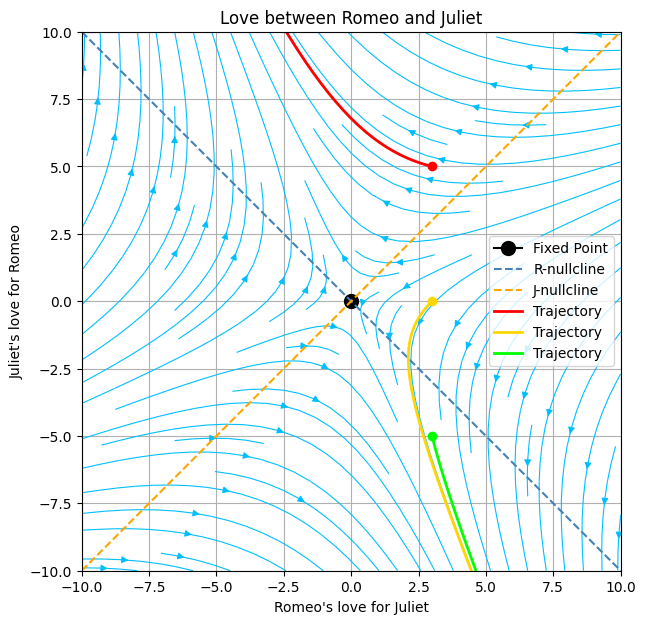

In [2]:
lo = -10
hi = 10
tmax = 10
r0s = [R0,R0,R0]
j0s = [J0, 0, -J0]

y1 = np.linspace(lo, hi, 20)
y2 = np.linspace(lo, hi, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

# find fixed points
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((a*x + b*y == 0) and (c*x + d*y == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)


plt.figure(figsize = (7, 7))
plt.streamplot(Y1, Y2, u, v, linewidth = 0.8 ,color = 'deepskyblue') # vector stream

x = np.linspace(lo, hi, 500)
if (a*d == b*c):
    if b != 0:
        y = -a*x / b
        plt.plot(x, y, '--', label = "Line of Fixed Points", color = 'black') # line of fps
else:
    for point in fp:
        plt.plot(point[0],point[1], "black", marker = "o", markersize = 10.0, label = "Fixed Point")
    if b != 0:
        y = -a*x / b
        plt.plot(x, y, '--', label = "R-nullcline", color = 'steelblue') # x-nullcline
    if d != 0:
        y = -c*x / d
        plt.plot(x, y, '--', label = "J-nullcline", color = 'orange') # y-nullcline

for r0,j0 in zip(r0s, j0s):
    tspan = np.linspace(0, tmax, 500)
    z0 = [r0, j0]
    sol = odeint(model, z0, tspan)
    if j0 < 0:
        plt.plot(sol[:,0], sol[:,1], label = "Trajectory", color = "lime", linewidth = 2) # path
        plt.plot([sol[0,0]], [sol[0,1]], 'o', color = "lime") # start
        #plt.plot([sol[-1,0]], [sol[-1,1]], 's', color = "green") # end
    elif j0 > 0:
        plt.plot(sol[:,0], sol[:,1], label = "Trajectory", color = "red", linewidth = 2) # path
        plt.plot([sol[0,0]], [sol[0,1]], 'o', color = "red") # start
        #plt.plot([sol[-1,0]], [sol[-1,1]], 's', color = "magenta") # end   
    else:
        plt.plot(sol[:,0], sol[:,1], label = "Trajectory", color = "gold", linewidth = 2) # path
        plt.plot([sol[0,0]], [sol[0,1]], 'o', color = "gold") # start
        #plt.plot([sol[-1,0]], [sol[-1,1]], 's', color = "yellow") # end

plt.axis('square')
plt.axis([lo, hi, lo, hi])
plt.xlabel("Romeo's love for Juliet")
plt.ylabel("Juliet's love for Romeo")
plt.title("Love between Romeo and Juliet")
plt.legend(loc = 'best')
plt.grid()
plt.show()
# Q = plt.quiver(Y1, Y2, u, v, color='r')

# plt.xlabel('$y_1$')
# plt.ylabel('$y_2$')
# plt.xlim([-2, 8])
# plt.ylim([-4, 4])